In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Gulim'
import warnings
warnings.filterwarnings('ignore')

In [3]:
d = sns.load_dataset('titanic')
d

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
d.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
d.groupby('alive')['alive'].count()

alive
no     549
yes    342
Name: alive, dtype: int64

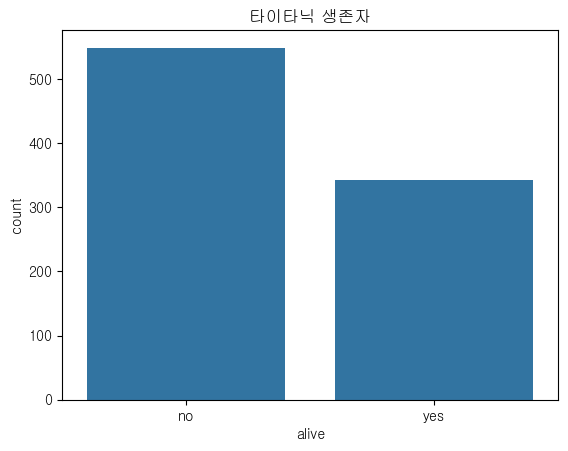

In [9]:
# 생존자와 사망자 수를 비교하는 그래프
sns.countplot(x='alive',data=d)
plt.title('타이타닉 생존자')
plt.show()

In [10]:
# 성별에 따른 생존자 수
d.groupby(['sex','alive'])['alive'].count()


sex     alive
female  no        81
        yes      233
male    no       468
        yes      109
Name: alive, dtype: int64

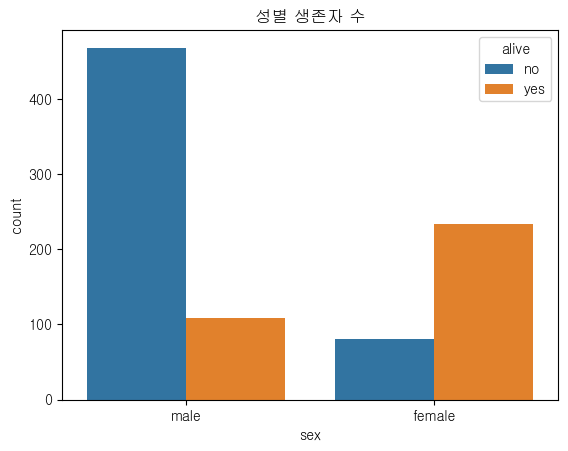

In [11]:
# 성별로 구분한 생존자 수 차트로 표현하기
sns.countplot(x='sex', hue='alive', data=d)
plt.title('성별 생존자 수')
plt.show()

In [12]:
# 성별에 따른 생존율을 수치로 확인하기
d[['sex','survived']].groupby('sex').mean()

,survived
sex,
female,0.742038
male,0.188908


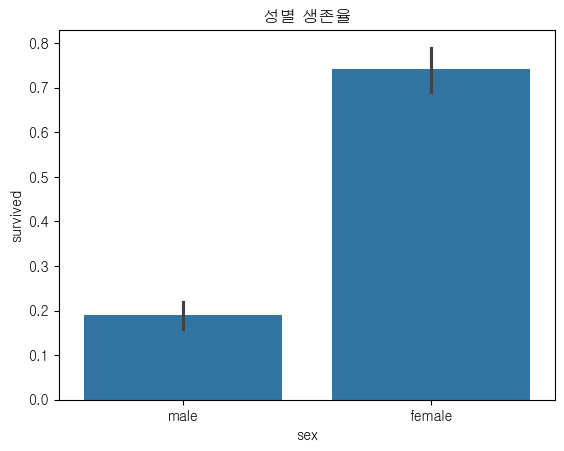

In [13]:
# 성별 생존율을 차트로 표현하기
plt.title('성별 생존율')
sns.barplot(data=d,x='sex',y='survived')
plt.show()

In [14]:
d.groupby('who').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alive,alone
who,,,,,,,,,,,,,,
child,83,83,83,83,83,83,83,83,83,83,13,83,83,83
man,537,537,537,413,537,537,537,537,537,537,99,537,537,537
woman,271,271,271,218,271,271,271,269,271,271,91,269,271,271


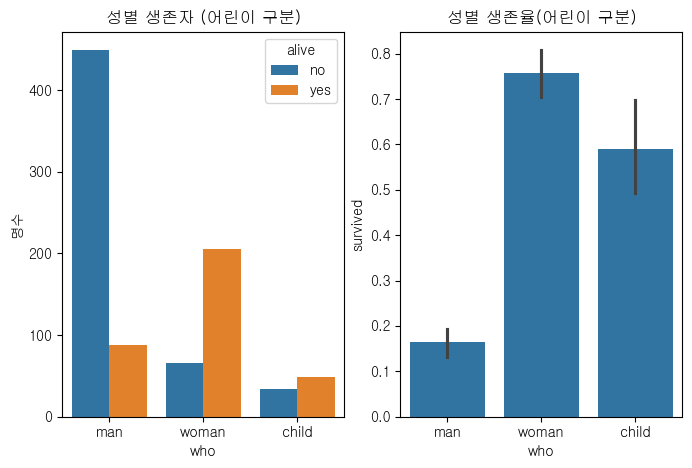

In [16]:
# 어린이/성인남자/성인여자별 생존자 수와 생존율 차트로 표현하기
d = sns.load_dataset('titanic')
f, ax = plt.subplots(1,2,figsize=(8,5))
sns.countplot(x='who',hue='alive', data=d, ax=ax[0])
ax[0].set_title('성별 생존자 (어린이 구분)')
ax[0].set_ylabel('명수')

sns.barplot(data=d,x='who',y='survived',ax=ax[1])
ax[1].set_title('성별 생존율(어린이 구분)')
plt.show()

In [17]:
d.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


In [18]:
# 승선한 객실 등급별 생존자 수 확인
d.groupby(['class','alive'])['alive'].count()

class   alive
First   no        80
        yes      136
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: alive, dtype: int64

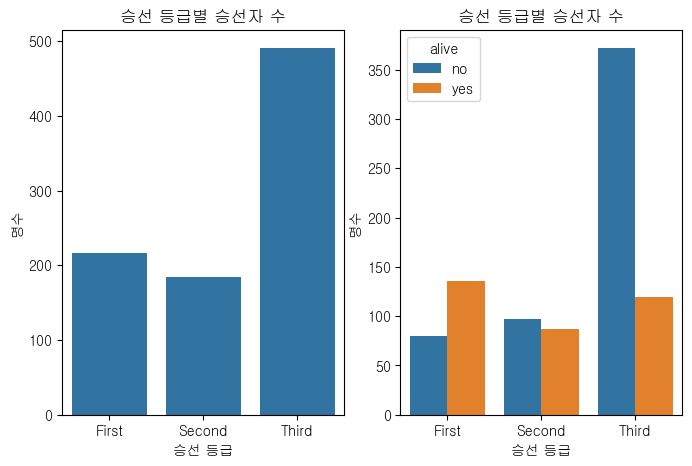

In [22]:
# 승선한 객실 등급별 생존자 수를 차트로 표현하기
f, ax = plt.subplots(1,2,figsize=(8,5))
sns.countplot(x='class',data=d, ax=ax[0])
ax[0].set_title('승선 등급별 승선자 수')
ax[0].set_xlabel('승선 등급')
ax[0].set_ylabel('명수')

sns.countplot(x='class',hue='alive', data=d, ax=ax[1])
ax[1].set_title('승선 등급별 승선자 수')
ax[1].set_xlabel('승선 등급')
ax[1].set_ylabel('명수')
plt.show()

In [23]:
# 승선한 객실 등급별 생존율
d.groupby(['class'])['survived'].mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

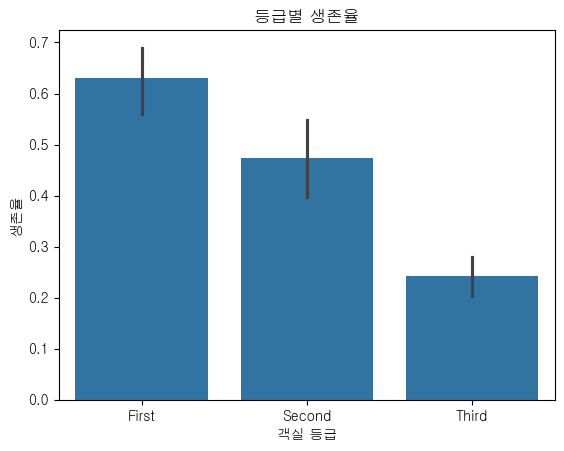

In [25]:
# 승선한 객실 등급별 생존율 차트로 표현하기
sns.barplot(data=d, x='class', y='survived')
plt.xlabel('객실 등급')
plt.ylabel('생존율')
plt.title('등급별 생존율')
plt.show()

In [26]:
# 승선한 객실 등급별, 성별에 따른 생존율 수치 확인하기
d.groupby(['class','sex'])['survived'].mean()

class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

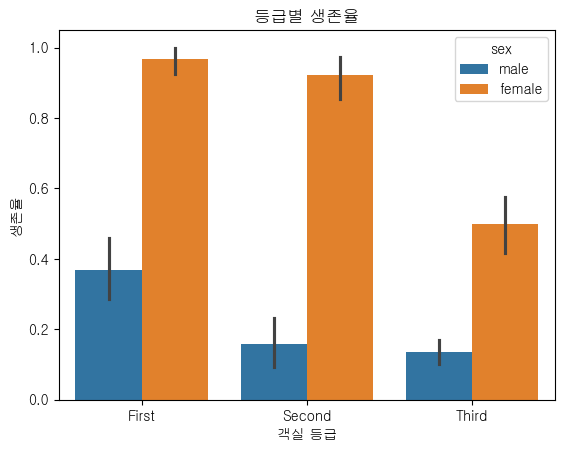

In [27]:
# 승선한 객실 등급별과 성별에 따른 생존율을 차트로 표현하기
sns.barplot(data=d, x='class', y='survived', hue='sex')
plt.xlabel('객실 등급')
plt.ylabel('생존율')
plt.title('등급별 생존율')
plt.show()

In [31]:
# 승선한 객실 등급별, 어린이/성인남자/성인여자 생존율을 수치로 확인
d.groupby(['class','who'])['survived'].mean()

class   who  
First   child    0.833333
        man      0.352941
        woman    0.978022
Second  child    1.000000
        man      0.080808
        woman    0.909091
Third   child    0.431034
        man      0.119122
        woman    0.491228
Name: survived, dtype: float64

In [30]:
d.groupby(['class','adult_male'])['survived'].mean()

class   adult_male
First   False         0.969072
        True          0.352941
Second  False         0.929412
        True          0.080808
Third   False         0.470930
        True          0.119122
Name: survived, dtype: float64

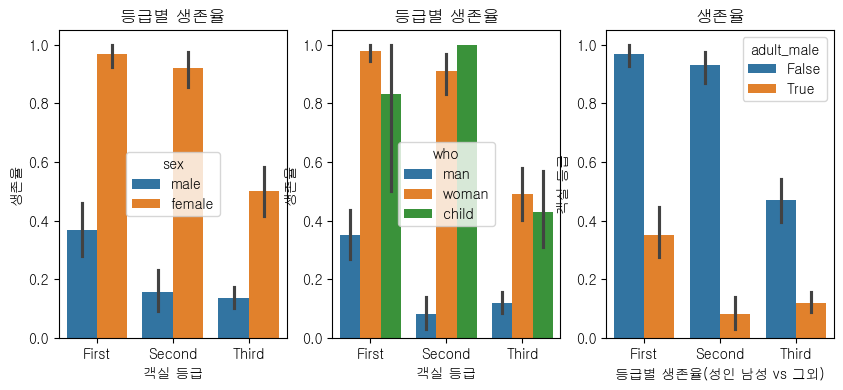

In [33]:
# 승선한 객실 등급별, 어린이/성인남자/성인여자의 생존율을 차트로 표현
f, ax = plt.subplots(1,3,figsize=(10,4))

sns.barplot(data=d, x='class', y='survived', hue='sex',ax=ax[0])
ax[0].set_xlabel('객실 등급')
ax[0].set_ylabel('생존율')
ax[0].set_title('등급별 생존율')

sns.barplot(data=d, x='class', y='survived', hue='who',ax=ax[1])
ax[1].set_xlabel('객실 등급')
ax[1].set_ylabel('생존율')
ax[1].set_title('등급별 생존율')

sns.barplot(data=d,x='class',y='survived',hue='adult_male',ax=ax[2])
ax[2].set_xlabel('등급별 생존율(성인 남성 vs 그외)')
ax[2].set_ylabel('객실 등급')
ax[2].set_title('생존율')

plt.show()

In [35]:
d['age'].isnull().sum()

177

In [36]:
# 어린이, 성인남자, 성인여자의 평균 나이 확인
d[['who','age']].groupby('who').mean()

,age
who,
child,6.369518
man,33.173123
woman,32.000000


In [38]:
# age필드의 결측치를 어린이, 성인남자, 성인여자의 평균 나이로 채우기
d.loc[(d['age'].isnull())&(d['who']=='child'),'age']=6
d.loc[(d['age'].isnull())&(d['who']=='man'),'age']=33
d.loc[(d['age'].isnull())&(d['who']=='woman'),'age']=32
d['age'].isnull().sum()

0

In [39]:
# 각 나이별 인원수 확인
d.groupby('age')['age'].count()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: age, Length: 88, dtype: int64

In [40]:
# 나이별 생존자수
d.groupby('age')['survived'].sum()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: survived, Length: 88, dtype: int64

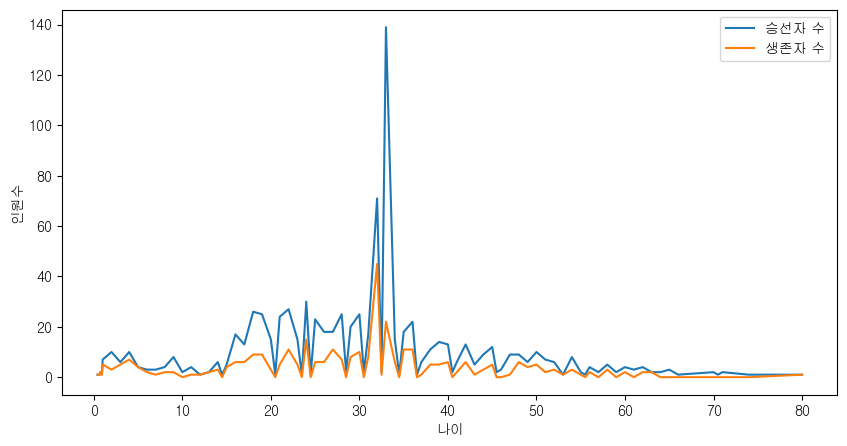

In [41]:
# 나이별 승선자 수와 생존자 수를 차트로 표현
plt.figure(figsize=(10,5))
sns.lineplot(data=d.groupby('age')['age'].count(), label='승선자 수')
sns.lineplot(data=d.groupby('age')['survived'].sum(), label='생존자 수')
plt.xlabel("나이")
plt.ylabel("인원수")
plt.show()


In [43]:
print("가장 많은 나이:", d['age'].max(),'살')
print("가장 어린 나이:", d['age'].min(),'살')
print("평균 나이:", d['age'].mean(),'살')

가장 많은 나이: 80.0 살
가장 어린 나이: 0.42 살
평균 나이: 30.29536475869809 살


In [44]:
# page.231 mission
d = sns.load_dataset("titanic")
# 1단계 : 동반한 형제 자매, 배우자 수에 따른 생존율
d.groupby("sibsp")["survived"].mean()

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

In [45]:
# 2단계 : 동반한 부모, 자식 수에 따른 생존율
d.groupby("parch")["survived"].mean()

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64

In [47]:
# 3단계 : 단독 승선 여부에 따른 생존율
d.groupby("alone")["survived"].mean()

alone
False    0.505650
True     0.303538
Name: survived, dtype: float64

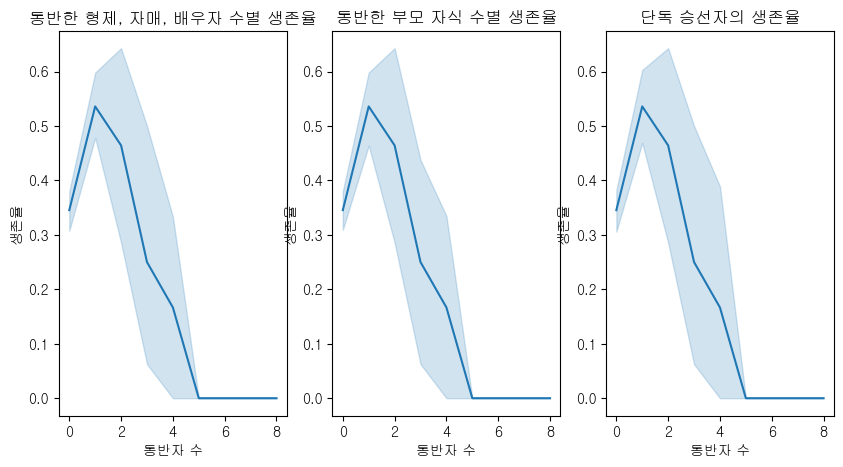

In [48]:
# 4단계 : 동반 승선 인원수에 따른 생존율 비교를 시각화하여 표현하기 

f, ax = plt.subplots(1,3,figsize=(10,5))

sns.lineplot(x='sibsp', y='survived', data=d,ax=ax[0])
ax[0].set_title("동반한 형제, 자매, 배우자 수별 생존율")
ax[0].set_xlabel("동반자 수")
ax[0].set_ylabel("생존율")

sns.lineplot(x='sibsp', y='survived', data=d,ax=ax[1])
ax[1].set_title("동반한 부모 자식 수별 생존율")
ax[1].set_xlabel("동반자 수")
ax[1].set_ylabel("생존율")


sns.lineplot(x='sibsp', y='survived', data=d,ax=ax[2])
ax[2].set_title("단독 승선자의 생존율")
ax[2].set_xlabel("동반자 수")
ax[2].set_ylabel("생존율")

plt.show()

In [49]:
# 5단계 : 형제 자매 배우자와 부모, 자식의 수를 모드 합하여 총 동반자 수를 구하여 신규 칼럼을 생성
d["family_size"]=d["sibsp"]+d["parch"]

Text(0, 0.5, '생존율')

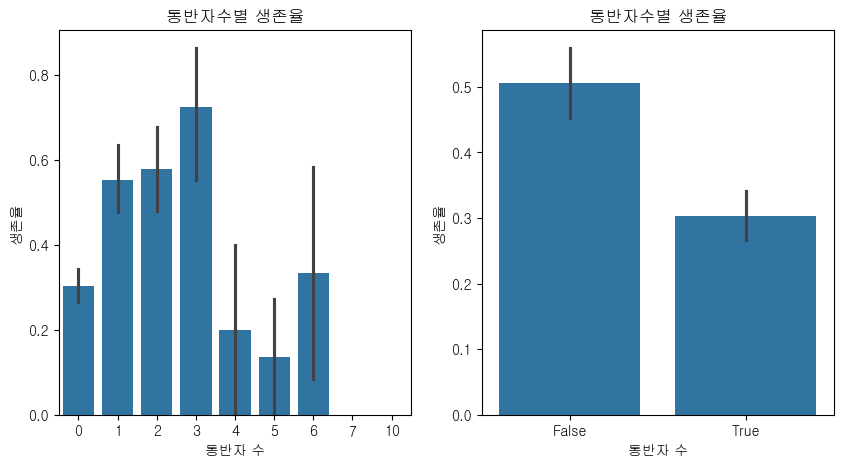

In [54]:
# 6단계: 전체 동반자 수 (5단계에서 생성한 family_size)에 따른 생존율을 시각화하여 표현
f, ax = plt.subplots(1,2,figsize=(10,5))

sns.barplot(x='family_size', y='survived', data=d,ax=ax[0])
ax[0].set_title("동반자수별 생존율")
ax[0].set_xlabel("동반자 수")
ax[0].set_ylabel("생존율")

sns.barplot(x='alone', y='survived', data=d,ax=ax[1])
ax[1].set_title("동반자수별 생존율")
ax[1].set_xlabel("동반자 수")
ax[1].set_ylabel("생존율")